## Coding (30 pts)

In [29]:
# Please do not add any other libraries, these should be enough
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import binom, uniform, bernoulli, randint, geom
%matplotlib inline

## Question 1

---



### Die Experiment (6 points)
We will do a die rolling experiment with a fair die.

**Calculating the Expectation:** $E[X] = \sum_{x \in \Omega_{X}}{x\cdot p_X[x]}$

**Calculating the Variance:** $\text{Var}(X) = E[(x - E[x])^2]$

In [30]:
def calculate_expectation(numbers, probs):
    """
    Calculates the expectation with given number and probabilities
    Returns the expectation
    Args:
        numbers: 1D list # values
        probs: 1D list # probabilities
    Return:
        result: float
    """
    result = None
    #calculating the expectation using the formula Σ(x * p) for each value and its probability
    result = sum(x * p for x, p in zip(numbers, probs))
    return result

def calculate_variance(numbers, probs):
    """
    Calculates the variance with given number and probabilities
    Returns the variance
    Args:
        numbers: 1D list # values
        probs: 1D list # probabilities
    Return:
        result: float
    """
    result = None

    #calculating the expected value using the previously defined function
    expected_value = calculate_expectation(numbers, probs)

    #calculating the variance using the formula Σ((x - E[x])^2 * p) for each value, its probability, and the expected value
    result = sum((x - expected_value) ** 2 * p for x, p in zip(numbers, probs))
    return result


die = [i for i in range(1, 7)]      #list of the numbers on the faces of the die
die_probs = [1/6 for i in range(6)]     #list of the probabilities for each number in the die

#calculating the expected value and variance for the die using the defined functions
die_expexted_value = calculate_expectation(die, die_probs)
die_variance_value = calculate_variance(die, die_probs)
print(f"Expected value for die: {die_expexted_value:.3f}")
print(f"Variance for die: {die_variance_value:.3f}")

Expected value for die: 3.500
Variance for die: 2.917


**Finding the average with experiments**

In [31]:
def roll_die(n):
    """
    roll die n times
    Returns records of experiments
    Args:
        n: int # number of experiment
    Return:
        array: np.array with size of n
    """
    
    array = []
    #generating 'n' random numbers within the range of a six-sided die (1 to 6) and record each roll
    array = [random.randint(1, 6) for N in range(n)]
    return np.array(array)

ns = [1,5,10,50,100,500,1000,5000,10000, 50000, 100000] # number of rolls

#performing die rolls for different specified numbers in 'ns'
for n in ns:
    rolls = roll_die(n) # rolling the dice for n times
    # calculate the mean of the rolls
    mean = rolls.mean()
    print(f"Average of {n} die rolls: {mean:.3f}")


Average of 1 die rolls: 2.000
Average of 5 die rolls: 2.400
Average of 10 die rolls: 4.000
Average of 50 die rolls: 3.940
Average of 100 die rolls: 3.510
Average of 500 die rolls: 3.484
Average of 1000 die rolls: 3.472
Average of 5000 die rolls: 3.539
Average of 10000 die rolls: 3.490
Average of 50000 die rolls: 3.488
Average of 100000 die rolls: 3.497


## Question 2 (5 points)

### Binomial Experiment
In this part we will visualize the PMF and the CDF.

We will use binomial distributions with n = 100 and p=0.2, p=0.5 and p=0.7, in that order.

#### Visualizing the Probability Mass Function (PMF)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


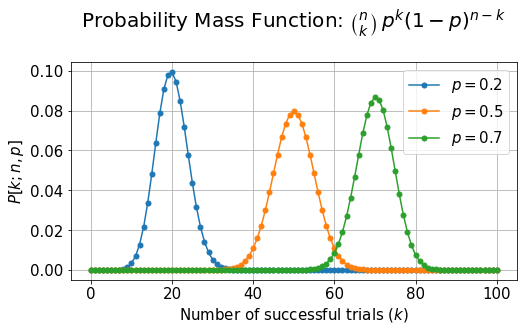

In [32]:
n = 100 # number of trials
probs = [0.2, 0.5, 0.7] # probabilities for each experiments' successful
x = np.arange(0,101,1) # range
plt.figure(figsize=(8,4))
print(x)

#calculation of Probability Mass Function 
for prob in probs:
    PMF = binom.pmf(x, n, prob)    
    plt.plot(x, PMF, marker='o', linestyle='-', markersize=5)

plt.legend(["$p=0.2$","$p=0.5$","$p=0.7$"],fontsize=15)
plt.title("Probability Mass Function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("$P[k;n,p]$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


#### Visualizing the Cumulative Distribution Function (CDF)

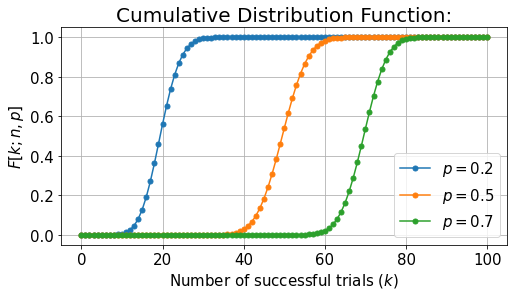

In [33]:
n = 100 # number of trials
probs = [0.2, 0.5, 0.7] # probabilities for each experiments' successful
x = np.arange(0,101,1) # range
plt.figure(figsize=(8,4))

#calculation of Cumulative Distribution Function 
for prob in probs:
    CDF = binom.cdf(x, n, prob)  
    plt.plot(x, CDF, marker='o', linestyle='-', markersize=5)

plt.legend(["$p=0.2$","$p=0.5$","$p=0.7$"],fontsize=15)
plt.title("Cumulative Distribution Function:",fontsize=20)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("$F[k;n,p]$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


## Question 3 (5 points)

### Geometric Experiment
In this part we will visualize the PMF and the CDF.

We will use the geometric distribution.

We consider three different experiments with probability of success of 0.2, 0.5 and 0.8 in that order.

#### Visualizing the Probability Mass Function (PMF)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


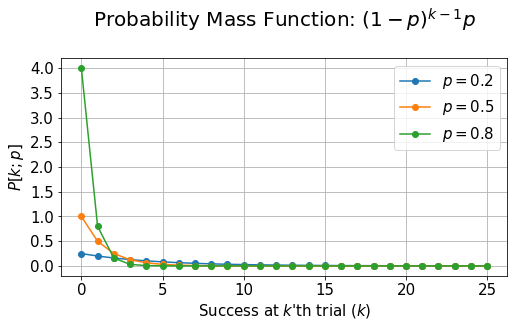

In [34]:
probs = [0.2, 0.5, 0.8] # probabilities for each experiments' successful
x = np.arange(0,26,1) # range
plt.figure(figsize=(8,4))
print(x)

#calculation of Probability Mass Function for the geometric distribution
for prob in probs:      
    PMF = (1 - prob) ** (x - 1) * prob
    plt.plot(x, PMF, marker='o')

plt.legend(["$p=0.2$","$p=0.5$","$p=0.8$"],fontsize=15)
plt.title("Probability Mass Function: $ (1-p)^{k-1} p$\n",fontsize=20)
plt.xlabel("Success at $k$'th trial ($k$)",fontsize=15)
plt.ylabel("$P[k;p]$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

#### Visualizing the Cumulative Distribution Function (CDF)

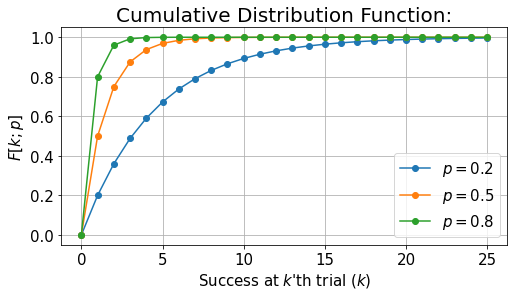

In [35]:
probs = [0.2, 0.5, 0.8] # probabilities for each experiments' successful
x = np.arange(0,26,1) # range
plt.figure(figsize=(8,4))

#calculation of Cumulative Distribution Function for the geometric distribution
for prob in probs:      
    CDF = 1 - (1 - prob) ** x
    plt.plot(x, CDF, marker='o')

plt.legend(["$p=0.2$","$p=0.5$","$p=0.8$"],fontsize=15)
plt.title("Cumulative Distribution Function:",fontsize=20)
plt.xlabel("Success at $k$'th trial ($k$)",fontsize=15)
plt.ylabel("$F[k;p]$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


## Question 4 (14 points)

### Monte-Carlo Experiment
In this part we will make a MC simulation for the **Problems-Q3** part a \& b.

In a party the host organizes a game with 99 empty boxes and 1 box with a prize. Each box is numbered 1 to 100 and there are 50 guests present in the party. Each guest takes a random box, checks if it has the prize and puts it back. If any of the guests finds the prize, the game finishes and the guests win, otherwise they lose.

1.   What is the probability that guests win the game? (**7 points**)
2.   Guests decide to unify and make a strategy beforehand. Each of them selects a number before the game starts and they make sure that no two guest selects the same number. What is the probability that guests win the game with this strategy? (**7 points**) \

Run 10000 trials for each part. Compare your theoretical and experimental solutions (You do not have to repeat your theoretical calculations in this part).

In [36]:
def game_simulation_without_strategy():
    prize_box = random.randint(1, 100)      #selecting a box randomly with a hidden prize (from 1 to 100)

    #simulating 50 attempts by the guest to select a box
    for _ in range(50):
        selected_box = random.randint(1, 100)       #guest selects a box randomly
        if selected_box == prize_box:       #checking if the selected box matches the box with the prize
            return True
    return False

def calculate_prob_without_strategy(trials):
    wins = 0
    #simulating the game for the specified number of trials
    for _ in range(trials):
        if game_simulation_without_strategy():      #checking if the guest wins in each trial
            wins += 1
    prob = wins / trials        #calculating the probability of winning based on the number of wins and total trials
    return prob

# Running 10000 trials for Q3a
trials = 10000
prob_without_strategy = calculate_prob_without_strategy(trials)     #calculating the probability of guests winning the game without any strategy
print("Probability of guests winning the game without strategy:", prob_without_strategy)

Probability of guests winning the game without strategy: 0.3911


In [37]:
def game_simulation_with_strategy(strategy):
    prize_box = random.randint(1, 100)      #selecting a box randomly with a hidden prize (from 1 to 100)

    #iterating through the boxes based on the provided strategy
    for selected_box in strategy:
        if selected_box == prize_box:       #checking if the selected box matches the box with the prize
            return True
    return False

def calculate_prob_with_strategy(trials):
    wins = 0
    for _ in range(trials):
        strategy = random.sample(range(1, 101), 50)     #generating a strategy by randomly selecting 50 unique boxes out of 100
        if game_simulation_with_strategy(strategy):     #checking if the guest wins using the generated strategy
            wins += 1
    prob = wins / trials        #calculate the probability of winning based on the number of wins and total trials
    return prob

# Running 10000 trials for Q3b
prob_with_strategy = calculate_prob_with_strategy(trials)       #calculating the probability of guests winning the game with strategy
print("Probability of guests winning the game with the strategy:", prob_with_strategy)

Probability of guests winning the game with the strategy: 0.5011
